In [36]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [37]:
df=pd.read_csv('Gaming-Trends-2024.csv')
df.head()

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0


In [38]:
df.shape

(4989, 11)

In [39]:
df.columns

Index(['Date', 'Platform', 'Daily Active Users (DAU)', 'New Registrations',
       'Session Duration (minutes)', 'In-game Purchases ($)',
       'Social Media Mentions', 'Stream Viewership', 'Revenue ($)',
       'Top Genre', 'Influencer Endorsements'],
      dtype='object')

In [40]:
df.dtypes

Date                           object
Platform                       object
Daily Active Users (DAU)        int64
New Registrations               int64
Session Duration (minutes)    float64
In-game Purchases ($)         float64
Social Media Mentions           int64
Stream Viewership             float64
Revenue ($)                   float64
Top Genre                      object
Influencer Endorsements         int64
dtype: object

In [41]:
#Data cleaning check any null value in this dataset
df.isnull().any()

Date                          False
Platform                      False
Daily Active Users (DAU)      False
New Registrations             False
Session Duration (minutes)    False
In-game Purchases ($)         False
Social Media Mentions         False
Stream Viewership             False
Revenue ($)                   False
Top Genre                     False
Influencer Endorsements       False
dtype: bool

In [ ]:
df.drop_duplicates(inplace=True)

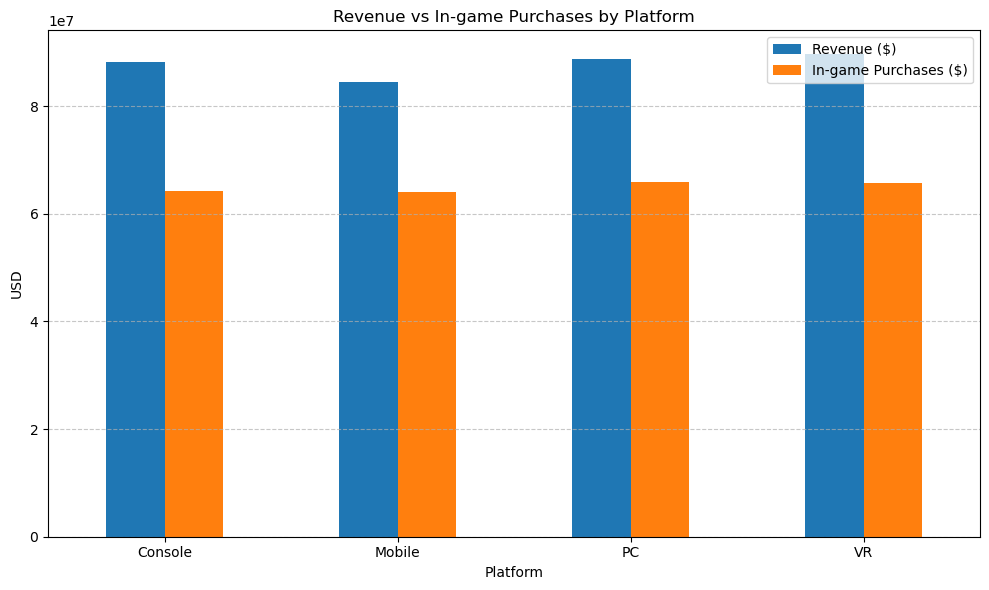

In [43]:
summary = df.groupby("Platform").sum()

# Calculate percentage of revenue from in-game purchases
summary["%_from_in_game"] = (summary["In-game Purchases ($)"] / summary["Revenue ($)"]) * 100

# Plotting
summary[["Revenue ($)", "In-game Purchases ($)"]].plot(kind="bar", figsize=(10, 6))
plt.title("Revenue vs In-game Purchases by Platform")
plt.ylabel("USD")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [44]:
platform=list(set(df['Platform']))
platform

['PC', 'Mobile', 'VR', 'Console']

In [45]:
genre=list(set(df['Top Genre']))
genre

['Action', 'Simulation', 'Adventure', 'FPS', 'RPG']

In [46]:
df.shape

(4989, 11)

In [47]:
date=list(df['Date'].str.split('-'))
years =set([year[0] for year in date])
years


{'2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024'}

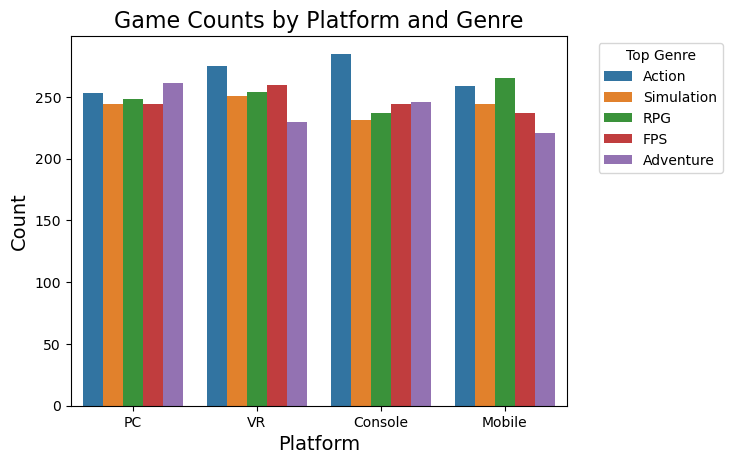

In [48]:
sns.countplot(data=df,x='Platform',hue='Top Genre')
plt.title('Game Counts by Platform and Genre', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


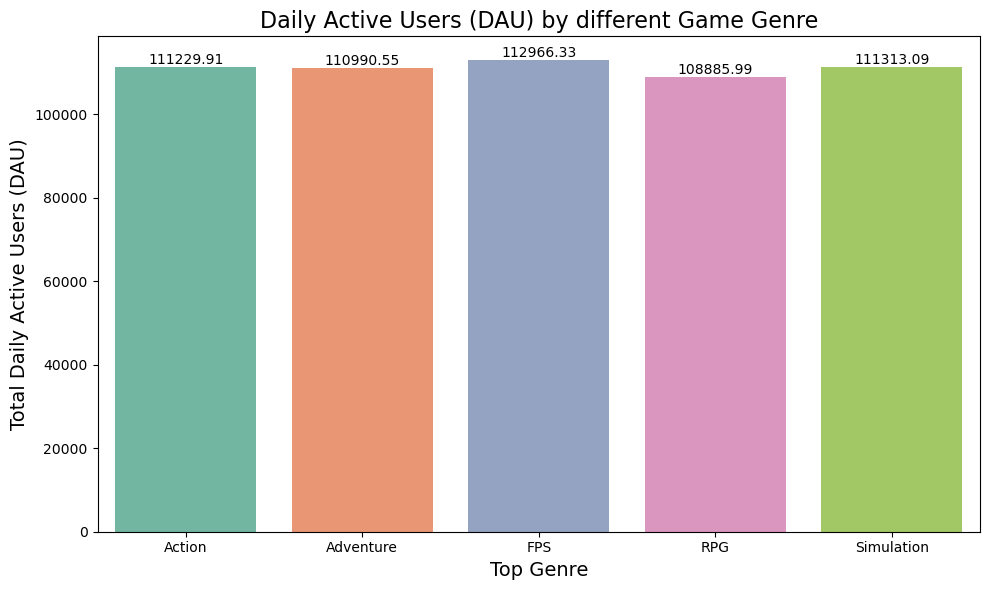

In [49]:


genre_mentions = round(df.groupby('Top Genre')['Daily Active Users (DAU)'].mean(),2).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_mentions, x='Top Genre', y='Daily Active Users (DAU)', palette='Set2')

plt.title('Daily Active Users (DAU) by different Game Genre', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Daily Active Users (DAU)', fontsize=14)

for index, row in genre_mentions.iterrows():
    plt.text(index, row['Daily Active Users (DAU)'] + 50, 
             row['Daily Active Users (DAU)'], 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

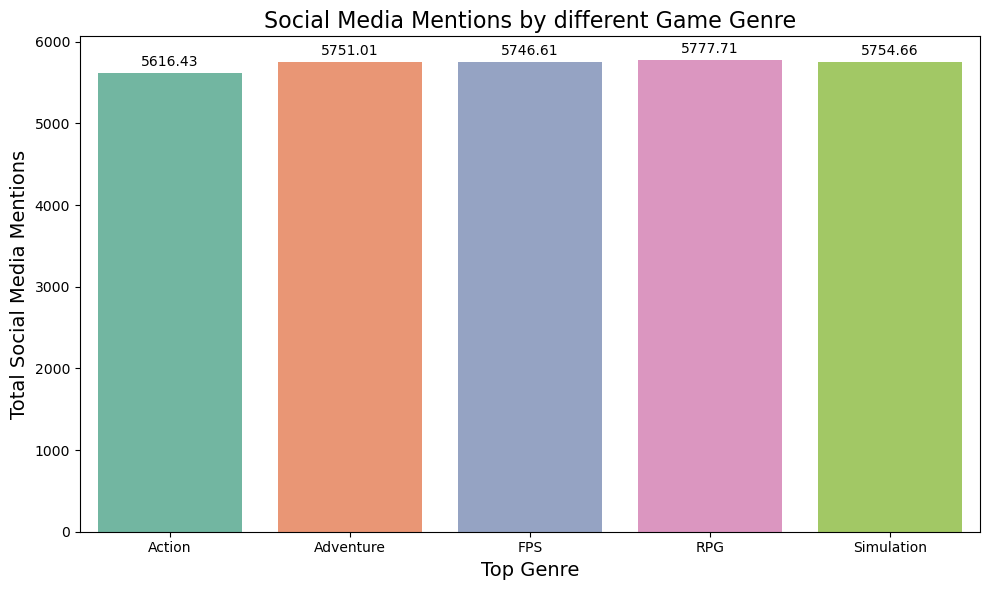

In [50]:
genre_mentions = round(df.groupby('Top Genre')['Social Media Mentions'].mean(),2).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_mentions, x='Top Genre', y='Social Media Mentions', palette='Set2')

plt.title('Social Media Mentions by different Game Genre', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Social Media Mentions', fontsize=14)

for index, row in genre_mentions.iterrows():
    plt.text(index, row['Social Media Mentions'] + 50, 
             row['Social Media Mentions'], 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

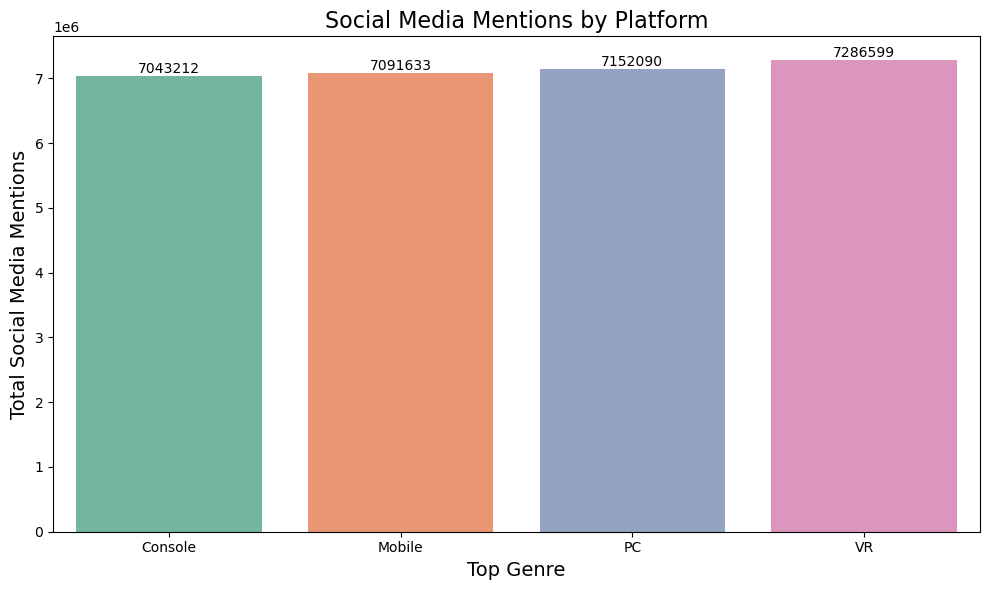

In [51]:
genre_mentions = df.groupby('Platform')['Social Media Mentions'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_mentions, x='Platform', y='Social Media Mentions', palette='Set2')

plt.title('Social Media Mentions by Platform', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Social Media Mentions', fontsize=14)

for index, row in genre_mentions.iterrows():
    plt.text(index, row['Social Media Mentions'] + 50, 
             row['Social Media Mentions'], 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

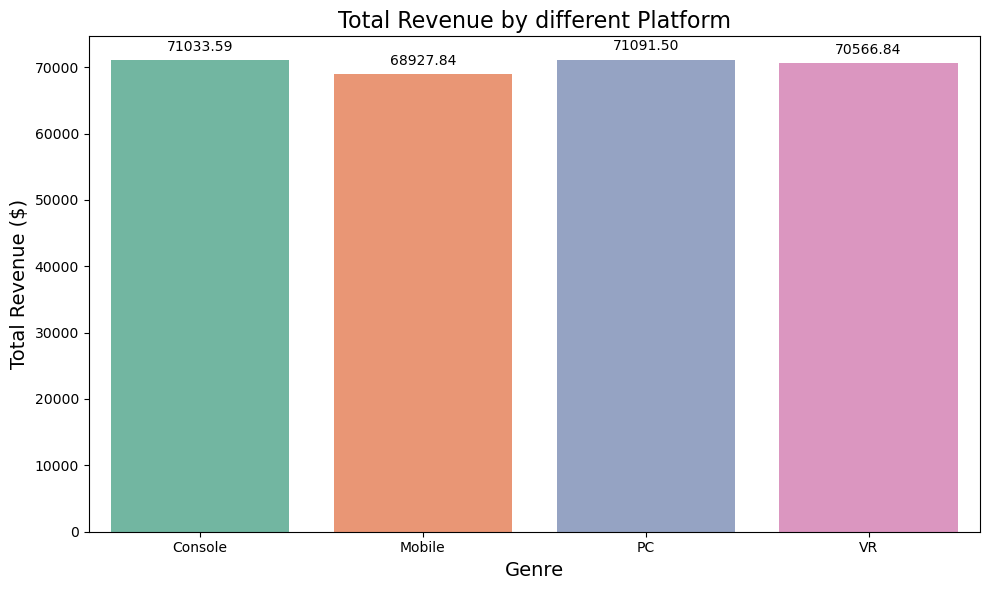

In [52]:
genre_revenue = df.groupby('Platform')['Revenue ($)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_revenue, x='Platform', y='Revenue ($)', palette='Set2')

plt.title('Total Revenue by different Platform', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

for index, row in genre_revenue.iterrows():
    plt.text(index, row['Revenue ($)'] + 1000, 
             f'{row["Revenue ($)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

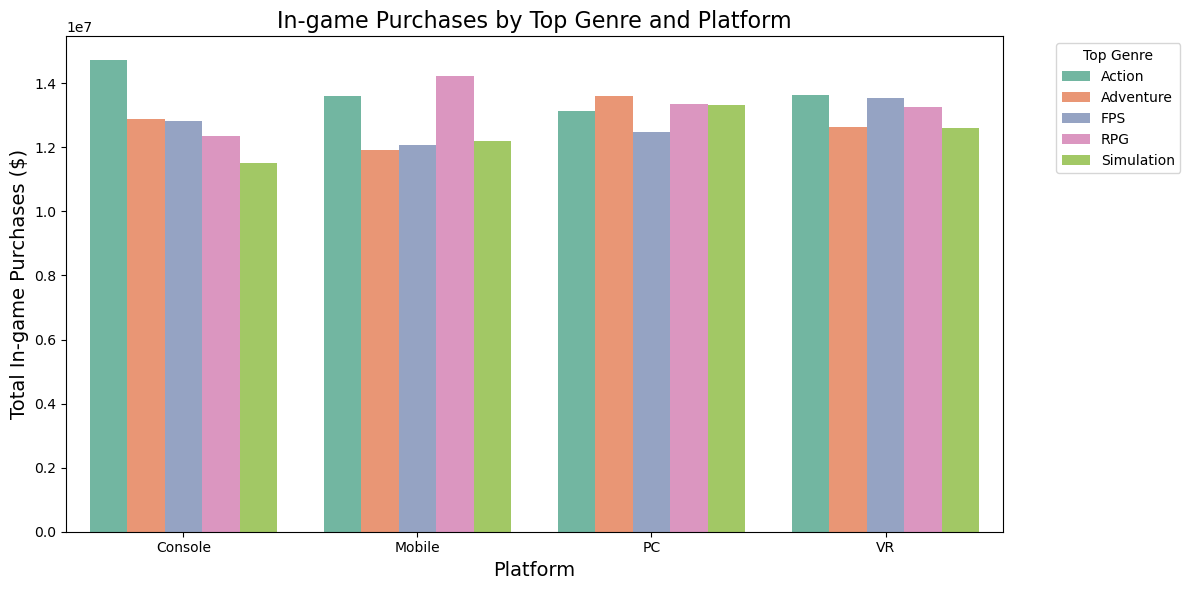

In [53]:
genre_platform_purchases = df.groupby(['Top Genre', 'Platform'])['In-game Purchases ($)'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_platform_purchases, x='Platform', y='In-game Purchases ($)', hue='Top Genre', palette='Set2')

plt.title('In-game Purchases by Top Genre and Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total In-game Purchases ($)', fontsize=14)



plt.legend(title='Top Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

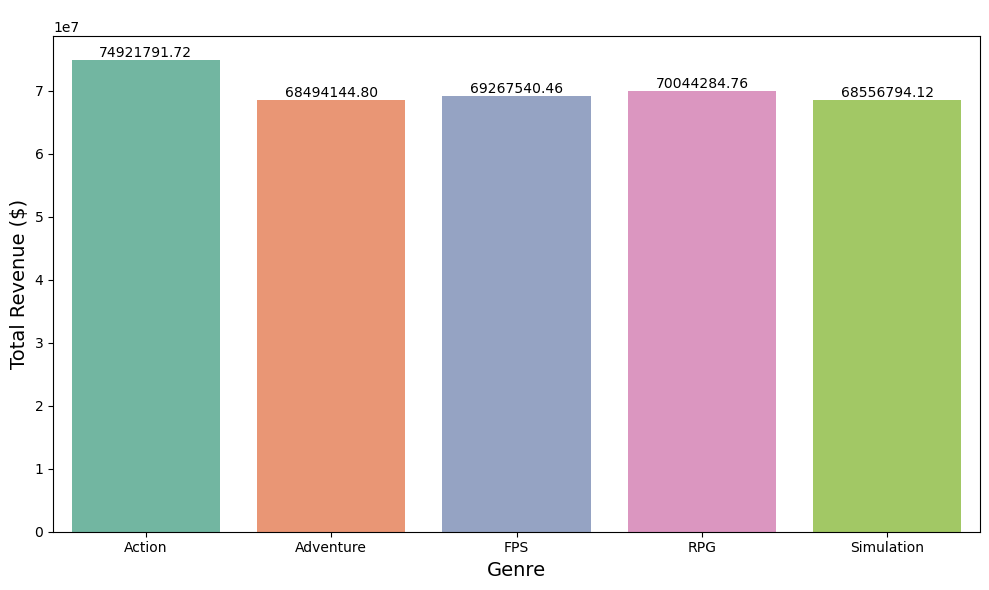

In [54]:
genre_revenue = df.groupby('Top Genre')['Revenue ($)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_revenue, x='Top Genre', y='Revenue ($)', palette='Set2')

plt.title(' ', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

for index, row in genre_revenue.iterrows():
    plt.text(index, row['Revenue ($)'] + 1000, 
             f'{row["Revenue ($)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

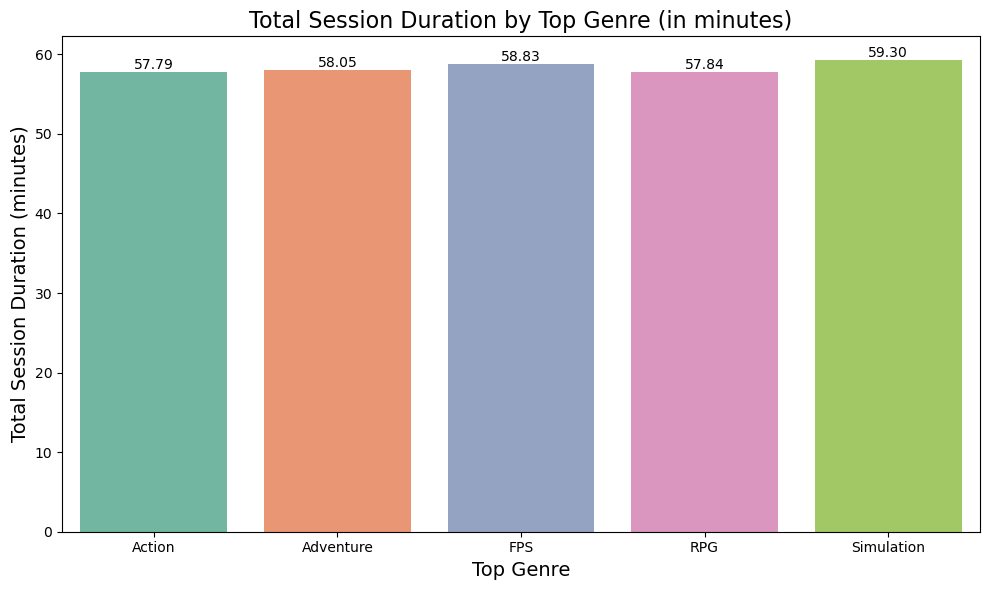

In [55]:
genre_session_duration = df.groupby('Top Genre')['Session Duration (minutes)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_session_duration, x='Top Genre', y='Session Duration (minutes)', palette='Set2')

plt.title('Total Session Duration by Top Genre (in minutes)', fontsize=16)
plt.xlabel('Top Genre', fontsize=14)
plt.ylabel('Total Session Duration (minutes)', fontsize=14)

for index, row in genre_session_duration.iterrows():
    plt.text(index, row['Session Duration (minutes)'], 
             f'{row["Session Duration (minutes)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

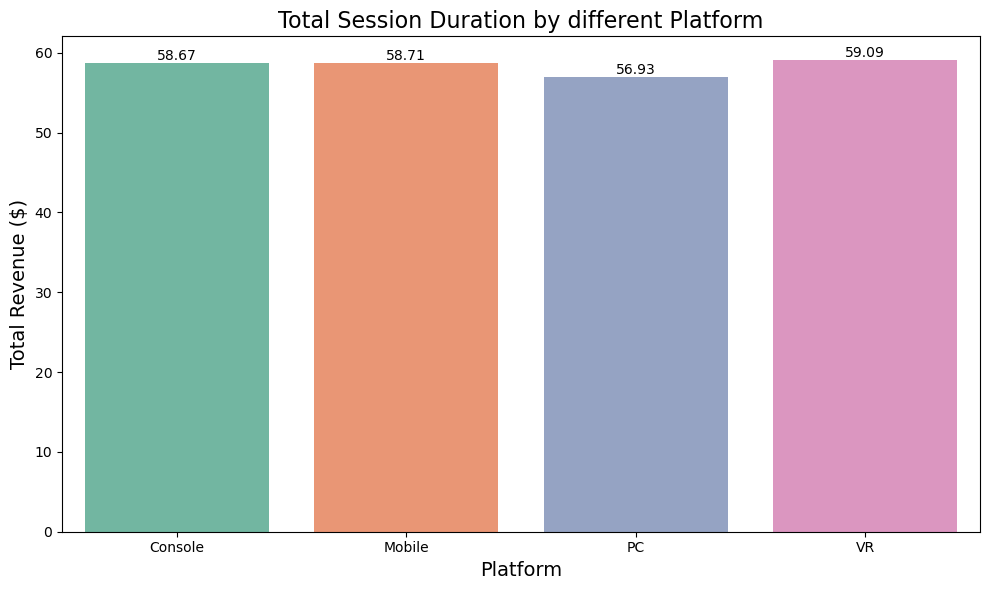

In [56]:
genre_revenue = df.groupby('Platform')['Session Duration (minutes)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_revenue, x='Platform', y='Session Duration (minutes)', palette='Set2')

plt.title('Total Session Duration by different Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)

for index, row in genre_revenue.iterrows():
    plt.text(index, row['Session Duration (minutes)'], 
             f'{row["Session Duration (minutes)"]:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)


val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


In [58]:
test_data

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
4653,2020-01-02,VR,160208,16020,77.072470,87224.546425,9095,64406.178361,99313.844918,Adventure,1
1936,2012-07-25,Mobile,198235,19823,83.752538,31861.735573,1083,54799.297005,110204.834979,Simulation,1
4400,2019-04-24,Mobile,116741,11674,91.242229,27850.503608,5681,60600.894903,123227.434255,FPS,0
1833,2012-04-13,Mobile,29979,2997,67.692004,22401.264184,2610,95741.715069,137293.687250,Simulation,0
203,2020-08-05,Console,126459,12645,64.800507,25462.961820,6394,83948.006691,24605.085130,Simulation,0
...,...,...,...,...,...,...,...,...,...,...,...
1451,2011-03-28,VR,23179,2317,74.275058,64479.614833,7989,53996.844114,29372.384281,Simulation,0
2361,2013-09-23,VR,184420,18442,70.066908,55157.171267,1835,97442.262518,120149.668138,Adventure,0
3653,2017-04-07,Console,22500,2250,75.659346,47604.109951,9165,30234.317184,50794.324804,Simulation,1
889,2021-03-05,Console,131758,13175,70.899694,21135.357042,6455,46497.834720,28644.934773,RPG,0
